In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

C:\Users\gaeta\AppData\Local\Temp\ipykernel_15056\3818186681.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [5]:
df = pd.read_csv('train_V2.csv')

In [6]:
df.shape

(5000, 53)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4947 non-null   float64
 1   profit_last_am         4947 non-null   float64
 2   profit_am              4947 non-null   float64
 3   damage_am              4954 non-null   float64
 4   damage_inc             4947 non-null   float64
 5   crd_lim_rec            4947 non-null   float64
 6   credit_use_ic          4947 non-null   float64
 7   gluten_ic              4947 non-null   float64
 8   lactose_ic             4947 non-null   float64
 9   insurance_ic           4947 non-null   float64
 10  spa_ic                 4970 non-null   float64
 11  empl_ic                4999 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             5000 non-null   bool   
 14  bar_no                 4947 non-null   float64
 15  spor

In [8]:
df.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,...,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


filter out the dummy data(there is no dummy data so  this doesn't matter)
address the categorical data as as appropriate

In [13]:
df[['gender','married_cd','client_segment','presidential','company_ic','retired']] = df[['gender','married_cd','client_segment','presidential','company_ic','retired']].astype('category')

look at descriptives and correlations

In [17]:
df.iloc[:,0:15].describe(include='all')

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no
count,4947.000000,4947.000000,4947.000000,4954.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4970.000000,4999.000000,4912.000000,5000,4947.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4057,NaN
mean,2281.260158,696.057712,3637.900950,145.952967,0.352335,3298.716394,0.041237,0.024661,0.094199,0.390944,0.401811,0.024205,6.051507,NaN,5.646250
std,8365.254507,3051.119275,5726.625669,581.068095,0.889449,4549.646039,0.198858,0.155107,0.292134,0.488011,0.490313,0.153700,3.112104,NaN,5.052513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,229.000000,0.000000,1638.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,NaN,2.000000
50%,469.000000,52.000000,1889.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,NaN,5.000000
75%,1688.000000,810.000000,3165.500000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,9.000000,NaN,8.000000


There are outliers: Two indicators for positive outliers are when the maximum value is a lot higher than the 75%-percentile and when the mean is higher than the median (50%-percentile).

we still need to decide if we want to keep the outliers or not this will make our analysis more robust

associations between features

C:\Users\gaeta\AppData\Local\Temp\ipykernel_15056\3939169330.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = features.drop(['income_am'],1)


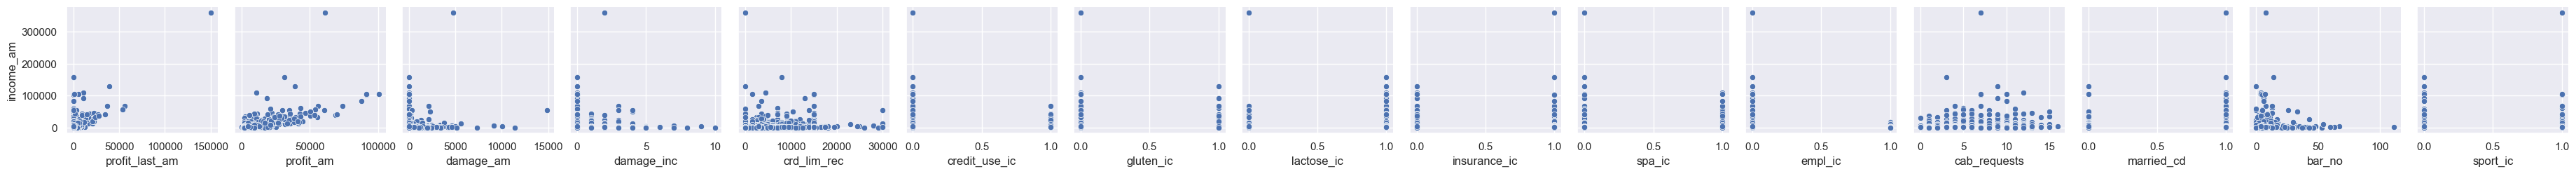

In [20]:
sns.set()
features = df.copy()
features = features.drop(['income_am'],1)
xvars = features.columns
sns.pairplot(df, y_vars=['income_am'],x_vars=xvars[0:15])#verander de 15 naarmate je meer variabelen wilt bekijken
plt.show();

the heatmap to see the correlations between the features

C:\Users\gaeta\AppData\Local\Temp\ipykernel_15056\2910816386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


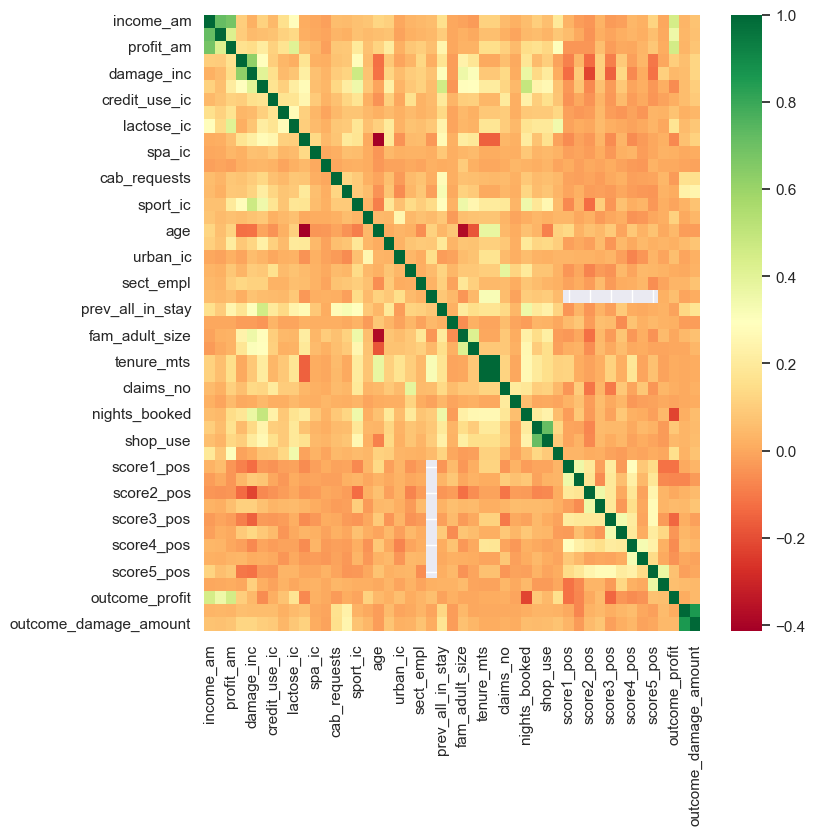

In [21]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, cmap='RdYlGn');

array([[<Axes: title={'center': 'income_am'}>,
        <Axes: title={'center': 'profit_last_am'}>,
        <Axes: title={'center': 'profit_am'}>,
        <Axes: title={'center': 'damage_am'}>,
        <Axes: title={'center': 'damage_inc'}>,
        <Axes: title={'center': 'crd_lim_rec'}>,
        <Axes: title={'center': 'credit_use_ic'}>],
       [<Axes: title={'center': 'gluten_ic'}>,
        <Axes: title={'center': 'lactose_ic'}>,
        <Axes: title={'center': 'insurance_ic'}>,
        <Axes: title={'center': 'spa_ic'}>,
        <Axes: title={'center': 'empl_ic'}>,
        <Axes: title={'center': 'cab_requests'}>,
        <Axes: title={'center': 'bar_no'}>],
       [<Axes: title={'center': 'sport_ic'}>,
        <Axes: title={'center': 'neighbor_income'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'marketing_permit'}>,
        <Axes: title={'center': 'urban_ic'}>,
        <Axes: title={'center': 'dining_ic'}>,
        <Axes: title={'center': 'president

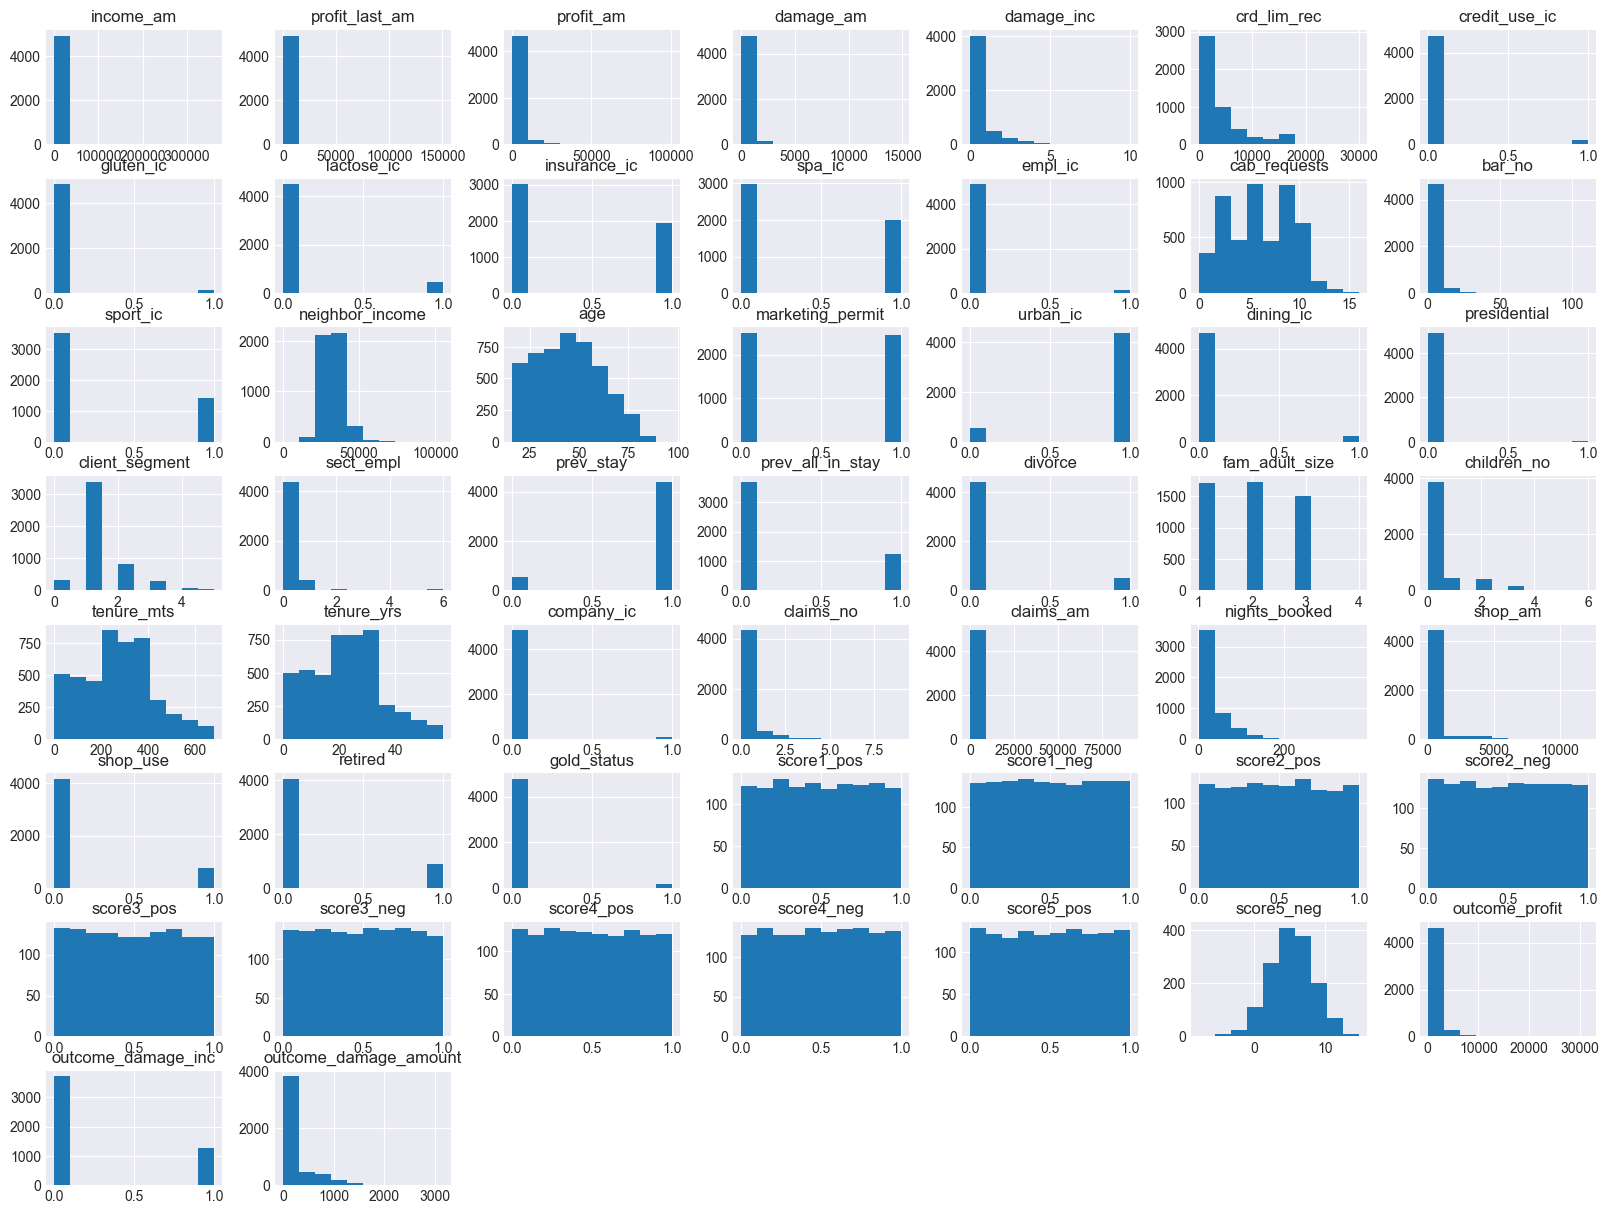

In [9]:
df.hist(figsize=(20,15))

FIRST PART OF DATA CLEANING
- checking duplicates and removing these

In [22]:
df_no_dup = df.copy()

df_no_dup.drop_duplicates()   # Remove the duplicates

print(df_no_dup.shape)               # check the remaining number of observations
df_no_dup.info()  

(5000, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   income_am              4947 non-null   float64 
 1   profit_last_am         4947 non-null   float64 
 2   profit_am              4947 non-null   float64 
 3   damage_am              4954 non-null   float64 
 4   damage_inc             4947 non-null   float64 
 5   crd_lim_rec            4947 non-null   float64 
 6   credit_use_ic          4947 non-null   float64 
 7   gluten_ic              4947 non-null   float64 
 8   lactose_ic             4947 non-null   float64 
 9   insurance_ic           4947 non-null   float64 
 10  spa_ic                 4970 non-null   float64 
 11  empl_ic                4999 non-null   float64 
 12  cab_requests           4912 non-null   float64 
 13  married_cd             5000 non-null   category
 14  bar_no                 4947 n

we still have 5000 observations so no duplicates were found 

belangrijke opmerkingen de 5 scores op de 5 hotels mss het gemiddelde nemen om 1 value te krijgen of de mediaan zo kunnen we missing values (invullen)